<a href="https://colab.research.google.com/github/lg960214/DACON_Seoul_6/blob/feat%2Fhhj/mpl_chropleth_facility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install geopandas
import pandas as pd
from geopandas.io.file import GeoDataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import geopandas as gpd

## 행정동명, 행정코드, 법정코드 추가(카카오API 사용)

In [138]:
import requests
df1=pd.read_csv('/content/drive/MyDrive/seoul/facility/보호주소.csv')
df2=pd.read_csv('/content/drive/MyDrive/seoul/facility/여가주소.csv')
df3=pd.read_csv('/content/drive/MyDrive/seoul/facility/의료주소.csv')
df4=pd.read_csv('/content/drive/MyDrive/seoul/facility/주거주소.csv')
df5=pd.read_csv('/content/drive/MyDrive/seoul/facility/재가주소.csv')
df6=pd.read_csv('/content/drive/MyDrive/seoul/facility/경로당주소.csv')
df_total=pd.concat([df1,df2,df3,df4,df5,df6])
addrs=df_total['시설주소']
addrs

0       서울특별시 서초구 남부순환로 2124까리따스종합복지관 (방배동)(방배동)
1                서울특별시 마포구 마포대로 182-10성촌빌딩 2층공덕동
2                   서울특별시 강북구 노해로 69대성빌딩 2층(수유동)
3               서울특별시 도봉구 도봉로108길 83-5 301호 (창동)
0                      서울특별시 성북구 화랑로18길 6 (상월곡동)
                          ...                   
3739                               서울특별시 강서구 마곡동
3740                               서울특별시 마포구 공덕동
3741                       서울특별시 영등포구 양평동3가 36번지
3742                               서울특별시 은평구 응암동
3743                 서울특별시 은평구 응암동 백련산힐스테이트2차아파트
Name: 시설주소, Length: 5063, dtype: object

In [ ]:
import requests
locations = []
for addr in addrs:
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query={}'.format(addr)
    headers = {
    ## 여러분의 카카오 API의 REST API키를 아래 예시와 같이 입력해주세요
    ## "Authorization": "KakaoAK REST API키 입력 gogo"}
    "Authorization": "KakaoAK e834188bdff38f4ba019535b196a20b4"}
    place = requests.get(url, headers = headers).json()['documents']
    locations.append(place)
town = [] ## 동, 읍, 면
code=[] #행정동 코드
bcode=[] #행정동 코드
for i in range(len(locations)):
    
    try:
        town.append(locations[i][0].get('address').get('region_3depth_h_name'))
        code.append(locations[i][0].get('address').get('h_code'))
        bcode.append(locations[i][0].get('address').get('b_code'))
        
        
    except IndexError:
        print(i,'번째 주소 못가져옴', end ='')
        print()

        town.append('')
        code.append('')
        bcode.append('')
    
    except AttributeError:

        town.append(locations[i][0].get('road_address').get('region_3depth_h_name'))
        code.append(locations[i][0].get('address').get('h_code'))
        bcode.append(locations[i][0].get('address').get('b_code'))

In [140]:
import numpy as np
town_code = np.array([town,code,bcode]).T
df_temp = pd.DataFrame(town_code, columns = ['region_3depth_h_name','h_code','b_code'])
df_temp.head()

,region_3depth_h_name,h_code,b_code
0,방배2동,1165061000,1165010100
1,공덕동,1144056500,1144010200
2,수유3동,1130563500,1130510300
3,창2동,1132051200,1132010700
4,월곡2동,1129072500,1129013700


In [141]:
df_total['행정동명']=df_temp['region_3depth_h_name']
df_total['행정동코드']=df_temp['h_code']
df_total['법정동코드']=df_temp['b_code']
df_total.head()

,시설명,시설주소,Latitude,Longitude,자치구,행정동명,행정동코드,법정동코드
0,서울특별시남부노인보호전문기관,서울특별시 서초구 남부순환로 2124까리따스종합복지관 (방배동)(방배동),37.474521,126.984240,서초구,방배2동,1165061000,1165010100
1,중앙노인보호전문기관,서울특별시 마포구 마포대로 182-10성촌빌딩 2층공덕동,37.550143,126.955921,마포구,공덕동,1144056500,1144010200
2,서울특별시북부노인보호전문기관,서울특별시 강북구 노해로 69대성빌딩 2층(수유동),37.641736,127.022143,강북구,수유3동,1130563500,1130510300
3,서울시학대피해노인전용쉼터,서울특별시 도봉구 도봉로108길 83-5 301호 (창동),37.645949,127.038520,도봉구,창2동,1132051200,1132010700
0,성북구립 상월곡실버복지센터,서울특별시 성북구 화랑로18길 6 (상월곡동),37.605741,127.050871,성북구,방배2동,1165061000,1165010100


In [142]:
df_total.to_csv('total.csv', index = False, encoding='utf-8-sig')


## 지도 시각화 (API에서 찾지못한 주소 처리 고민-일단 제거해서 테스트)

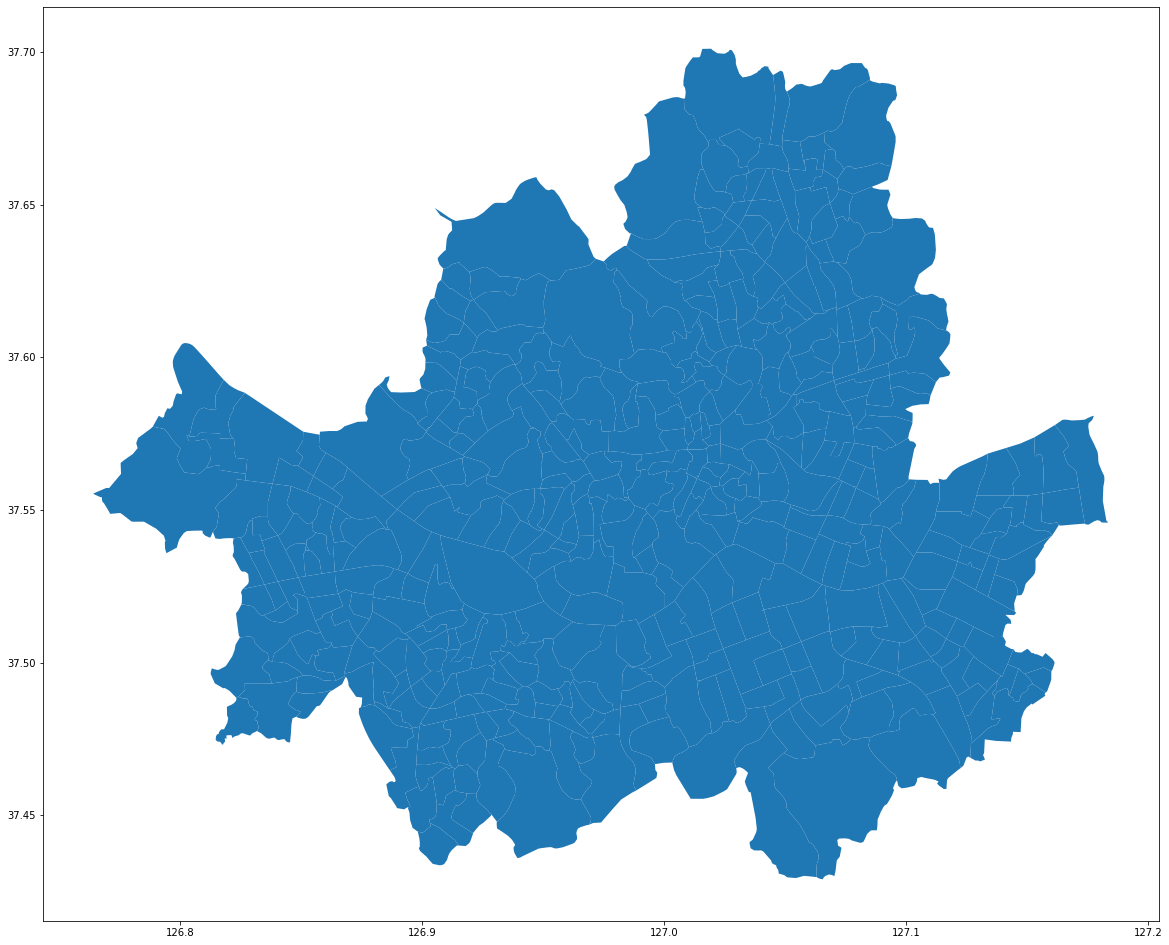

geopandas.geodataframe.GeoDataFrame

In [158]:
plt.rcParams["figure.figsize"] = (20, 10) # 차트 사이즈
mpl.rcParams["axes.unicode_minus"] = False

"""노인보호전문기관"""
# 데이터 형식의 통일
#total_na - 불러오지못한 주소 삭제한 파일(5067 중 687 없음)
data = pd.read_csv('/content/total_na.csv', encoding='utf-8')
n = data.shape[0]
adm_cd = []
for i in range(n):
    adm_cd.append(str(data['행정동코드'][i]))
data['adm_cd2'] = adm_cd
"""행정동 위치 파일과 결합"""
geo = gpd.read_file('/content/drive/MyDrive/DACON6/DACON_Lecture/data.shp',encoding='euc-kr')
geo
plt.rcParams['figure.figsize']=(20,20)
geo.plot()
plt.show()
df_geo= geo.iloc[:,[3,9]]
type(df_geo)

In [162]:
from geopandas.io.file import GeoDataFrame
import matplotlib.pyplot as plt
import seaborn as sns
facility_count=data.groupby('adm_cd2',as_index=False)['시설명'].count()
facility_count['adm_cd2']=facility_count['adm_cd2'].astype(object)
facility_count=facility_count[['시설명','adm_cd2']]
facility_count=pd.DataFrame(facility_count)

type(facility_count)

cdata = pd.merge(facility_count, df_geo, on = 'adm_cd2',how='left')
data_merge = gpd.GeoDataFrame(cdata, crs="EPSG:4326", geometry="geometry")
cdata
from geopandas import GeoDataFrame

cdata = GeoDataFrame(cdata)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 1440x1440 with 0 Axes>

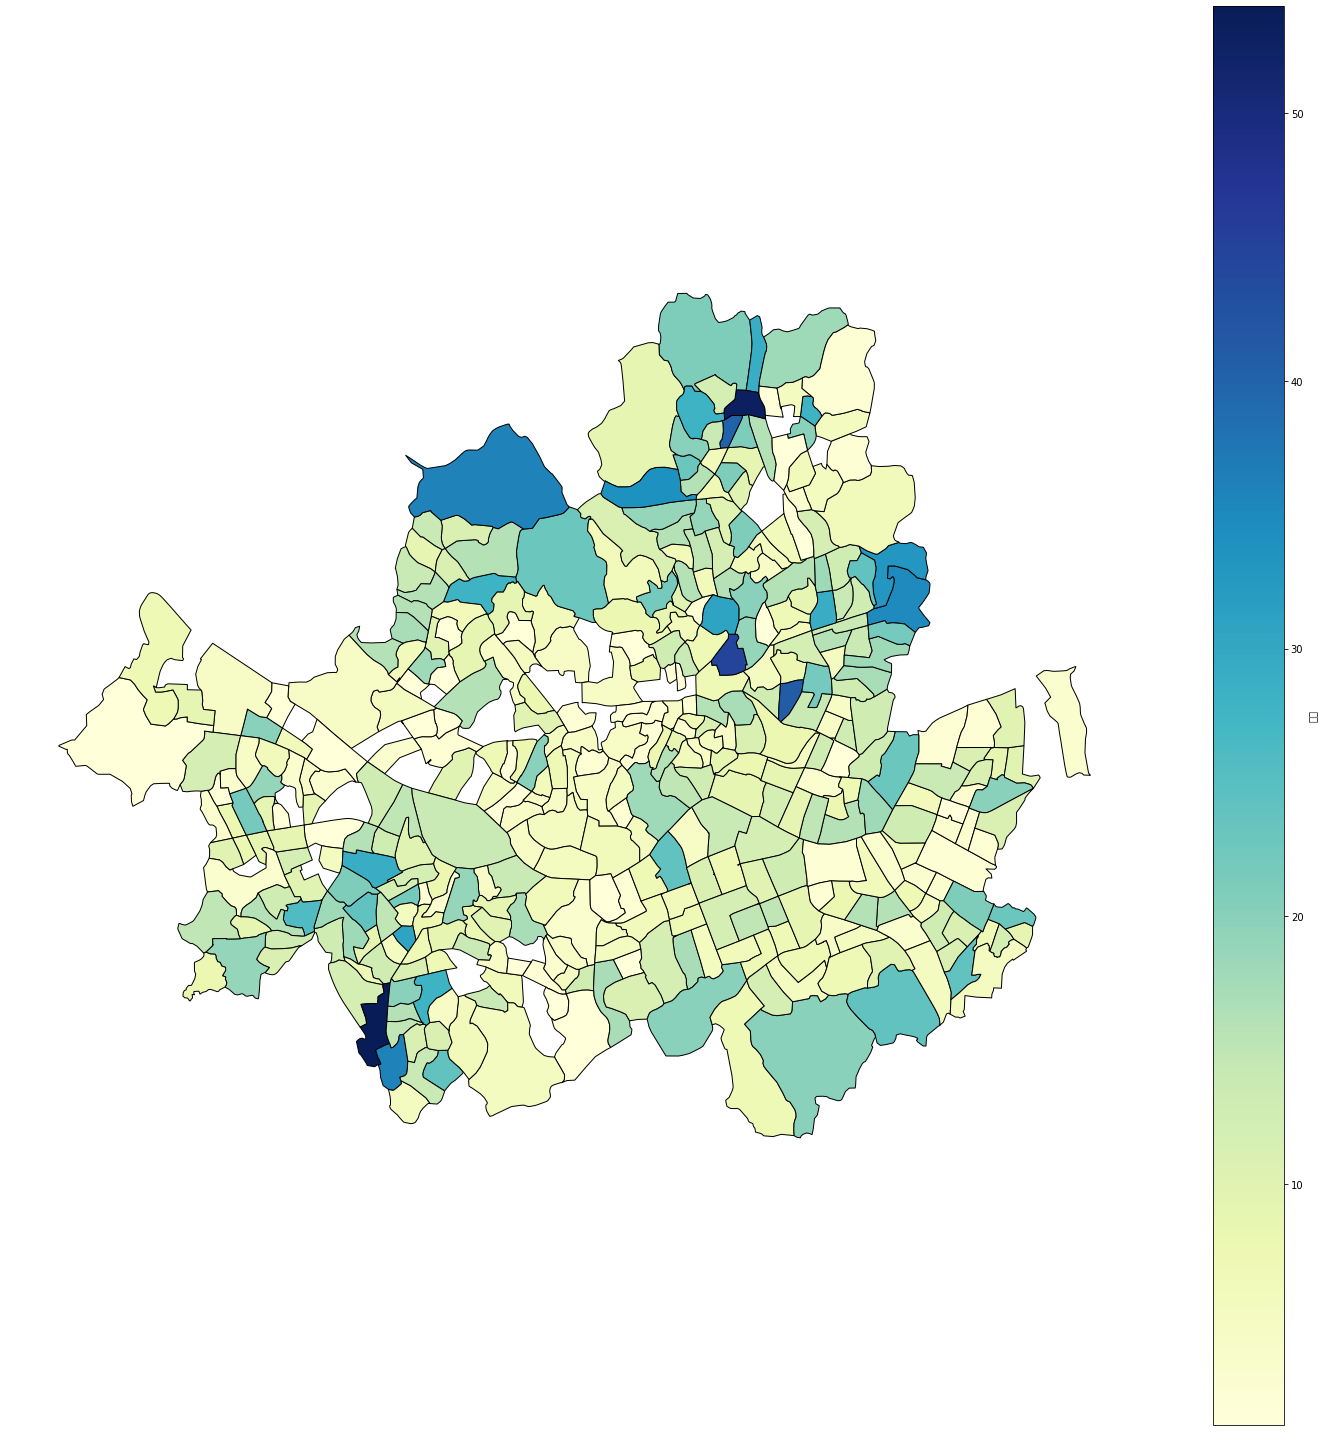

In [168]:
fig = plt.figure()
cdata.plot(column='시설명',
                 legend=True,
                 cmap='YlGnBu',
                 edgecolor='k',
                 legend_kwds={'label': '개수'})
plt.axis('off')
plt.tight_layout()
plt.savefig('facility_ad.png')
plt.show()